
1.- IMPORTACION DE LAS LIBRERÍAS

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

Se importan las librerias a utilizar pandas,numpy, matplotlib y sklearn

2.- LECTURA DEL DATAFRAME

In [6]:
from google.colab import drive

# Monta Google Drive
drive.mount('/content/drive')

# Especificar la ruta del archivo subido
file_path = '/content/drive/MyDrive/MLtalleres/Talleres/Datasets/Peliculas.csv'

# Leer el archivo CSV
df = pd.read_csv(file_path)
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              peliculas  Amor  Aventura  Accion  Comedia  Terror  Crimen  \
0      Mision Imposible     0         1       1        0       0       0   
1    Piratas del Caribe     0         1       1        1       0       0   
2  Resacon en las Vegas     0         0       0        1       0       0   
3            James Bond     0         1       0        0       0       0   
4             Toy Story     0         1       0        0       0       0   
5               Jumanji     0         1       0        0       0       0   

   Drama  Fantasia  Misterio  Thriller  Guerra  Biografia  Animacion  
0      0         0         0         0       0          0          0  
1      0         0         0         0       0          0          0  
2      0         0         0         0       0          0          0  
3      0         0         0         0       0        

3.- PROCESAMIENTO DE LOS DATOS

In [12]:
genres = df.iloc[:, 1:]
print(genres)

   Amor  Aventura  Accion  Comedia  Terror  Crimen  Drama  Fantasia  Misterio  \
0     0         1       1        0       0       0      0         0         0   
1     0         1       1        1       0       0      0         0         0   
2     0         0       0        1       0       0      0         0         0   
3     0         1       0        0       0       0      0         0         0   
4     0         1       0        0       0       0      0         0         0   
5     0         1       0        0       0       0      0         1         1   

   Thriller  Guerra  Biografia  Animacion  
0         0       0          0          0  
1         0       0          0          0  
2         0       0          0          0  
3         0       0          0          0  
4         0       0          0          1  
5         0       0          0          0  


Extreamos todas las columnas las cuales son los generos que compararemos a expecion de la primera

4.- DESCRIPCION DE FUNCION DE SIMILITUD

In [13]:
cosine_sim = cosine_similarity(genres)

cosine_sim_df = pd.DataFrame(cosine_sim, index=df['peliculas'], columns=df['peliculas'])

# Mostrar el dataframe de similitudes
print("Similitud del Coseno entre Películas:")
print(cosine_sim_df)

Similitud del Coseno entre Películas:
peliculas             Mision Imposible  Piratas del Caribe  \
peliculas                                                    
Mision Imposible              1.000000            0.816497   
Piratas del Caribe            0.816497            1.000000   
Resacon en las Vegas          0.000000            0.577350   
James Bond                    0.707107            0.577350   
Toy Story                     0.500000            0.408248   
Jumanji                       0.408248            0.333333   

peliculas             Resacon en las Vegas  James Bond  Toy Story   Jumanji  
peliculas                                                                    
Mision Imposible                   0.00000    0.707107   0.500000  0.408248  
Piratas del Caribe                 0.57735    0.577350   0.408248  0.333333  
Resacon en las Vegas               1.00000    0.000000   0.000000  0.000000  
James Bond                         0.00000    1.000000   0.707107  0.577350

5.- GRAFICO COMPARATIVO DE SIMILITUD ENTRE PELÍCULAS

Grafico 1


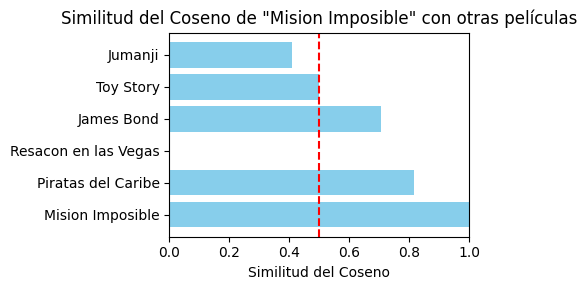

Grafico 2


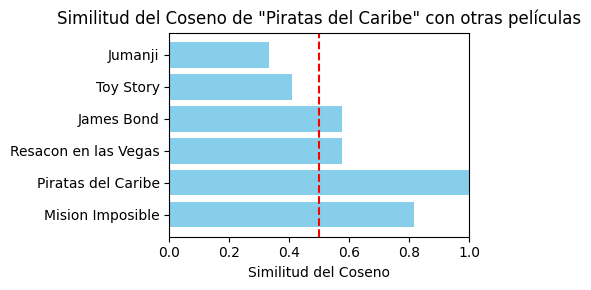

Grafico 3


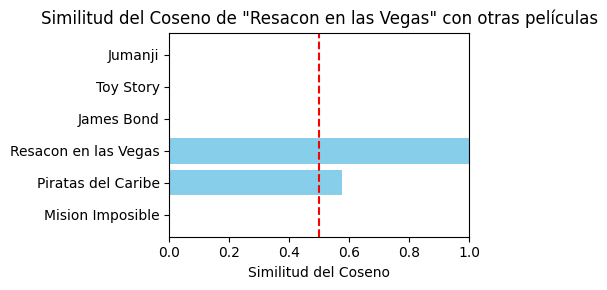

Grafico 4


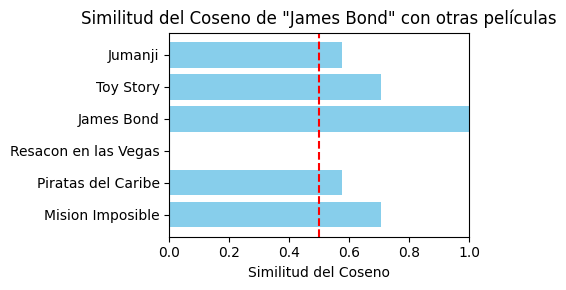

Grafico 5


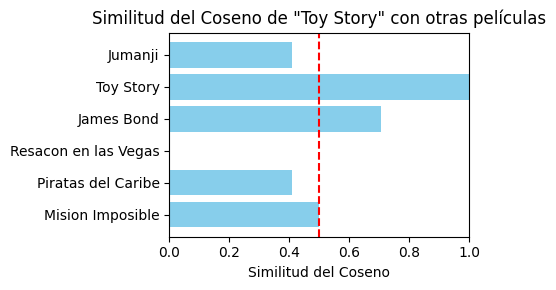

Grafico 6


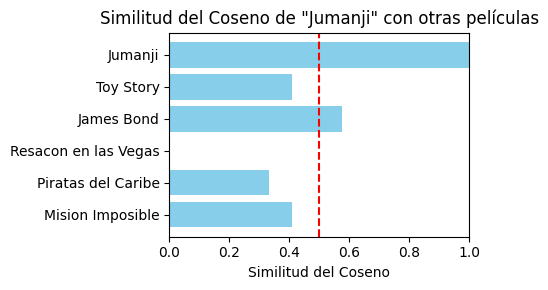

In [20]:
#Gráficos de similitud para cada película
for idx, movie in enumerate(df['peliculas']):
    print("Grafico", idx+1)
    similarities = cosine_sim[idx]
    plt.figure(figsize=(5, 3))
    plt.barh(df['peliculas'], similarities, color='skyblue')
    plt.xlabel('Similitud del Coseno')
    plt.title(f'Similitud del Coseno de "{movie}" con otras películas')
    plt.axvline(x=0.5, color='red', linestyle='--')  # Línea de referencia para similitud del coseno 0.5
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()